## Simple Linear Regression

### steps to build a Machine Learning Model
    1. understanding objective and  gathering Domain Knowledge
    2. Gather data and Aggregate in structre format (store in the form of Data form)
    3. Exploratory Data Analysis
    4. Data Preprocessing using Data pipelines for machine learning model
        Ouliers
        fixing Outliers
        fixing missing values
        Scaling Data
        Transforming non_numerical data into Numerical data 
        Feature engineering- new features using existing feature or drop irrelevant features(feature selection)
### This is 80% of work and this is called data engineering        
     5. selecting and training machone learning model
     6. evaluation and error analysis(performance measurement)
     7. Hyper_parameter tuning to improve performance of ML model
     8. Model deployment(Launch) and Monitoring and Maintainance of Ml model

### simple linear regression

Regression 
    predecting value of continous linearly depend variable(target values) on the basis of independent variables

In [1]:
import numpy as np 
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
mpg = sns.load_dataset("mpg").dropna()  # dropna function is used to remove all the missing values

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
num_features = ["displacement", "horsepower", "weight", "acceleration"]
x = mpg[num_features]
y = mpg["mpg"]

### objective
    predict mpg(y) of a car on the basis of displacement(x1), 
    horsepower(x2), weight(x3), accelaration(x4)

In [5]:
x.head()

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5


In [6]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

are these features relevent to predeict milege
EDA?

In [7]:
x.corrwith(y)

displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
dtype: float64

<Axes: xlabel='horsepower', ylabel='horsepower'>

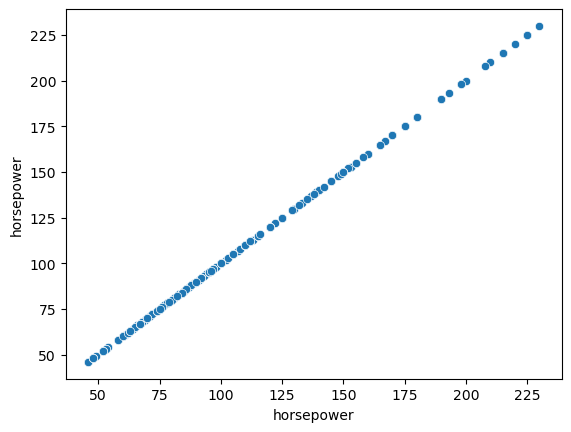

In [8]:
sns.scatterplot(data=mpg, x ="horsepower", y ="horsepower")

In [9]:
np.corrcoef(mpg["horsepower"], mpg["horsepower"])[0, 1]

1.0

array([[1.(relation of x with x), 1.(relation of x with y)],
       [1.(relation ofy with y), 1.(relation of y with x)]])        

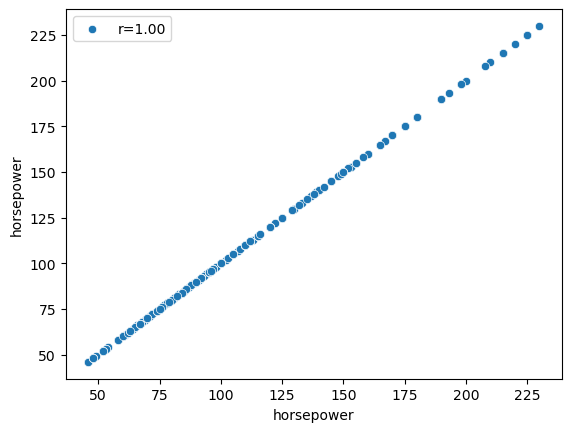

In [10]:
r = np.corrcoef(mpg["horsepower"], mpg["horsepower"])[0,1]
sns.scatterplot(data=mpg, x ="horsepower", y ="horsepower", label=f"r={r:.2f}")
plt.legend()

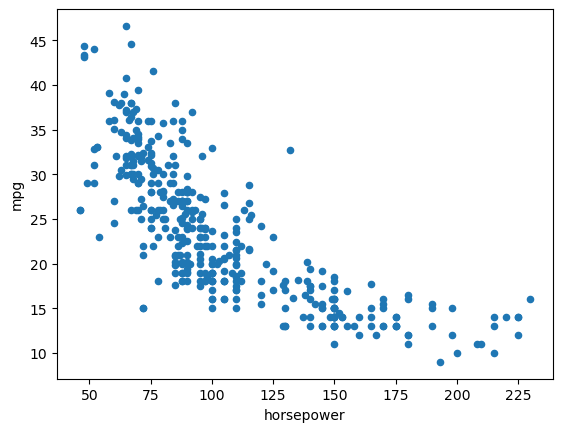

In [11]:
mpg.plot(kind="scatter", 
        x = "horsepower", 
        y = "mpg" )
plt.show()

In [12]:
np.corrcoef(mpg["horsepower"], mpg["mpg"])[0, 1]

-0.7784267838977762

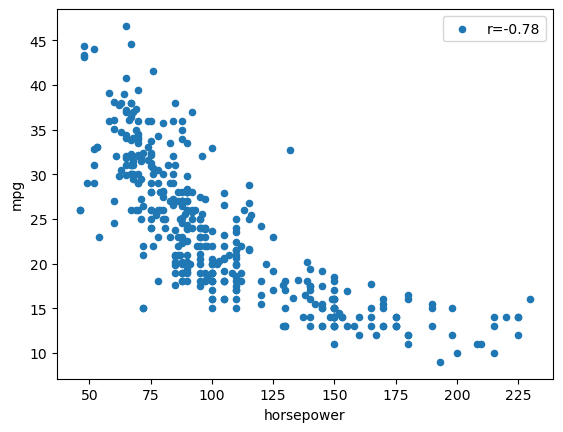

In [13]:
r=np.corrcoef(mpg["horsepower"], mpg["mpg"])[0, 1]
mpg.plot(kind="scatter", 
        x = "horsepower", 
        y = "mpg",
        label = f"r={r:.2f}")
plt.show()

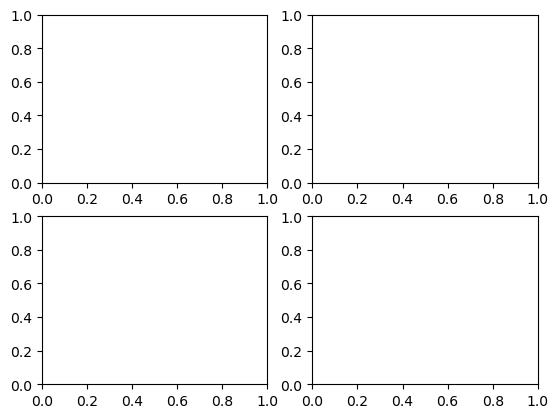

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)

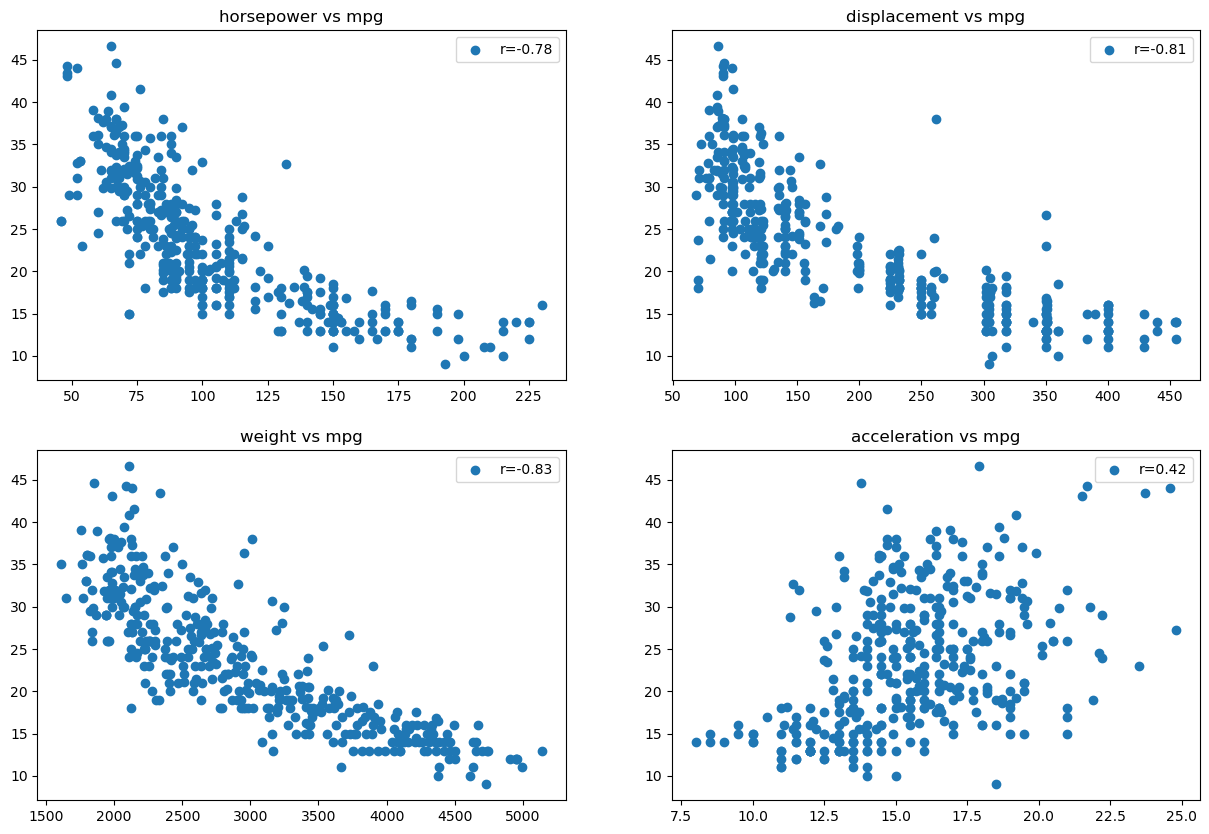

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))

seq = zip(
    ["horsepower", "displacement", "weight", "acceleration"],
    [    ax1,           ax2,        ax3,            ax4     ])

for col, ax in seq:
    r = np.corrcoef(mpg[col], mpg["mpg"])[0, 1]
    ax.scatter(mpg[col], mpg["mpg"],label = f"r={r:.2f}")
    ax.set_title(f"{col} vs mpg")
    ax.legend()
    
plt.show()                   

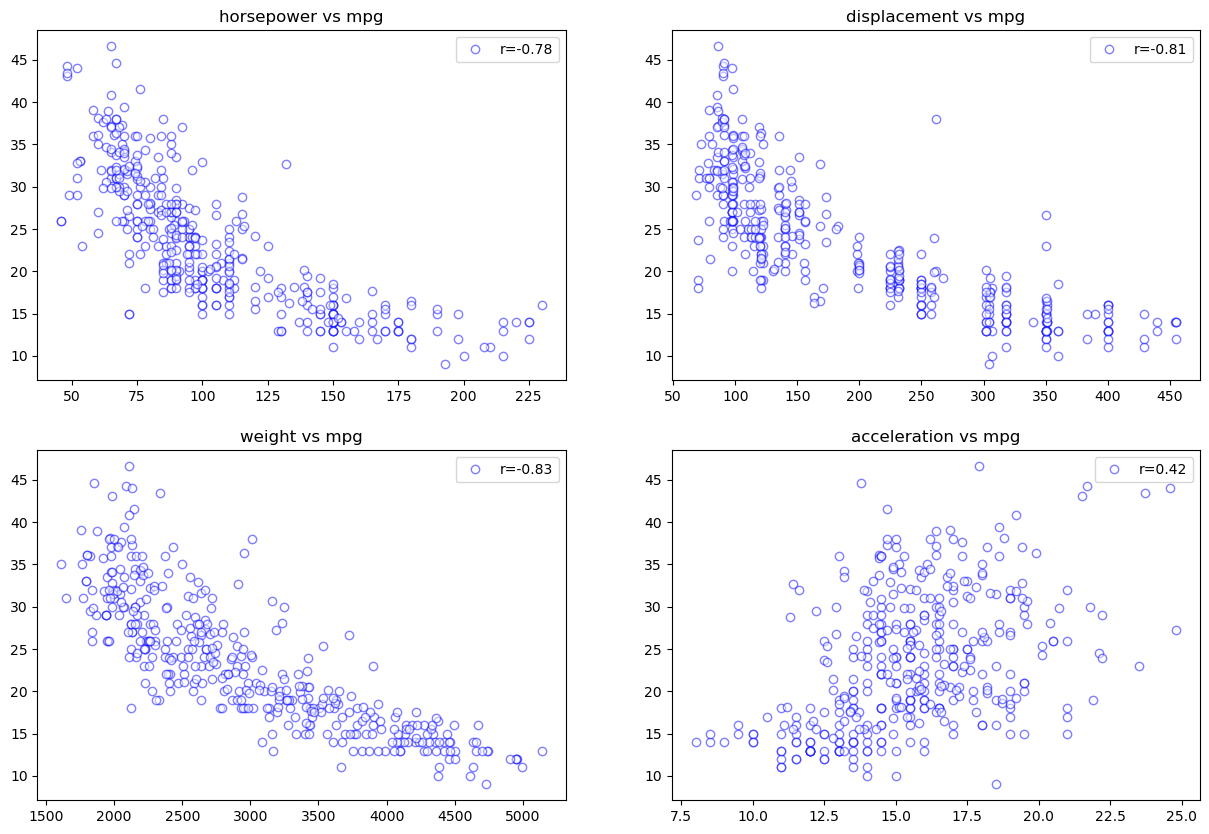

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))

seq = zip(
    ["horsepower", "displacement", "weight", "acceleration"],
    [    ax1,           ax2,        ax3,            ax4     ])

for col, ax in seq:
    r = np.corrcoef(mpg[col], mpg["mpg"])[0, 1]
    ax.plot(mpg[col], mpg["mpg"], "bo", label = f"r={r:.2f}", mfc = "white", alpha = 0.5)
    ax.set_title(f"{col} vs mpg")
    ax.legend()
    
plt.show()                   

In [17]:
x = np.random.random(100)*100
y = np.random.random(100)*500

In [18]:
np.corrcoef(x, y)

array([[ 1.        , -0.11506171],
       [-0.11506171,  1.        ]])

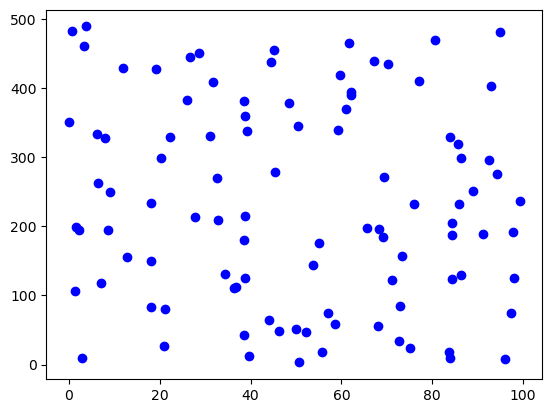

In [19]:
plt.plot(x, y, 'bo')

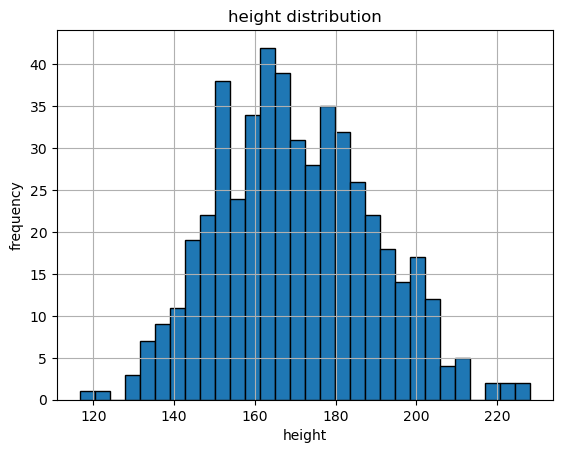

In [20]:
height = np.random.normal(170, 20, 500)
plt.hist(height, ec ='k', bins=30)
plt.grid()
plt.title("height distribution")
plt.xlabel("height")
plt.ylabel("frequency")
plt.show()

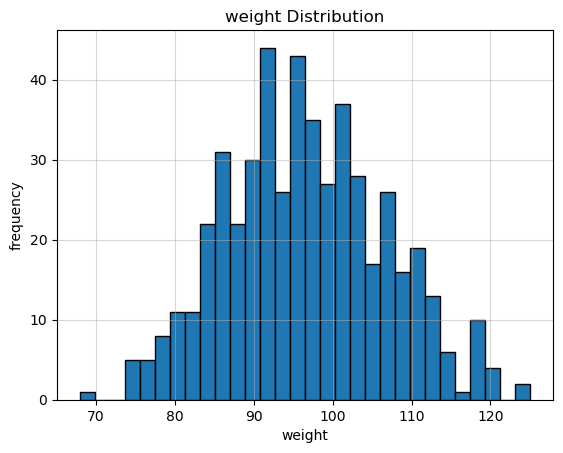

In [21]:
weight = np.random.normal(20, 5, 500) + 0.45 * height
plt.hist(weight, ec='k', bins= 30)
plt.grid(alpha=0.5)
plt.title("weight Distribution")
plt.xlabel("weight")
plt.ylabel("frequency")
plt.show()

In [22]:
r = np.corrcoef(height, weight)[0,1]
print(r)

0.8572340503433495


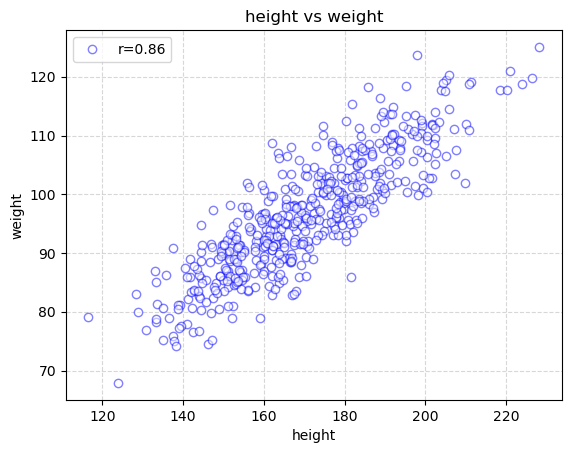

In [23]:
plt.plot(height, weight, "bo", mfc="white", alpha=0.5, label=f"r={r:.2f}")
plt.xlabel("height")
plt.ylabel("weight")
plt.title("height vs weight")
plt.grid(alpha=0.5, ls='--')
plt.legend()

### simple linear regression
    predicting a single dependent variable on the basis of single independent variable 
    1 feature and 1 target than it's SLR
    we want to predict weight using height

In [26]:
# self generated linearly dependent data to understand simple linear regression
height = np.random.normal(170, 20, 500)
weight = np.random.normal(18, 3, 500) + 0.40*height

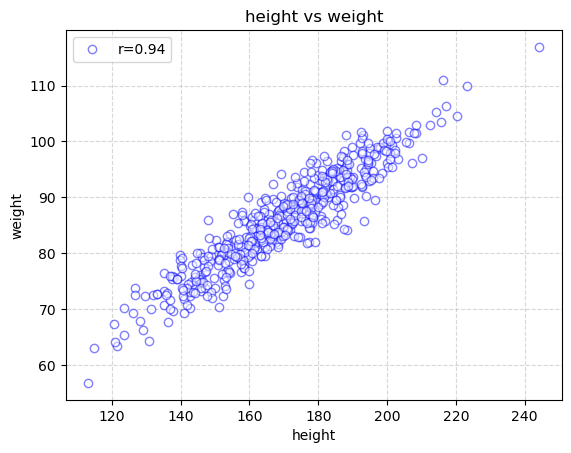

In [27]:
r = np.corrcoef(height, weight)[0,1]
plt.plot(height, weight, "bo", mfc="white", alpha=0.5, label=f"r={r:.2f}")
plt.xlabel("height")
plt.ylabel("weight")
plt.title("height vs weight")
plt.grid(alpha=0.5, ls='--')
plt.legend()

what do you understand by learning in machine learning?
                    or
what do you mean fitting training data ? or what does for function do in machine learning?

learning or fitting is process by which we find best value for hypothesis / prediction functions parameters using training data.

In every algorithm for ML there will be:-
1. prediction function / hypothesis function-->gives parameters
2. we use parameters in-->Cost function / Error function --> we select the parameter which has minimum error
3. Evaluation Metrices / performance Measurement
4. Hyper Parameters Tunning

### Linear Regression

$\hat y = \theta_0 + \theta_1 X _1 + \theta_2 X _2 + .....\theta_nX_n$
1. $\hat y$ = estimated value of y 
2. $\theta$ = parameters of equation 
3. $X_i$  = input featues on the basis of which we are estimating y using parameters

$\hat {\text {weight}} = \theta_0 + \theta_1 * \text{height}$

### cost function 

    mean squared error

$\text {mse} = \frac{\sum{(\hat y_i - y_i)} ^ 2} {N}$



### learning or fitting
    finding the best value of parameters(Theta) such that it minimises cost function(MSE)
    
     to find this we need to derivate cost with respect to parameters and find the minimum value of parameters 
     using training data

$\theta = {(X^TX)}^{-1}X^Ty$     vector format

$$\theta_1 = \frac {\sum (\bar y - y^{(i)}) (\bar X_1 -{X_1}^{(i)})} {\sum (\bar X_1 - {X_1}^{(i)})^2}$$


$$ \theta_0 = \bar y - \theta_1 \bar X_1  $$

In [58]:
height = np.random.normal(170, 20, 500)
weight = np.random.normal(18, 3, 500) + 0.40*height

In [59]:
y = weight
x1 = height

In [67]:
theta_1 = ((y.mean()-y)*(x1.mean()-x1)).sum() / ((x1.mean()-x1)**2).sum()
theta_0 =  y.mean() - theta_1 * x1.mean()
print("coef/slope", theta_1)
print("Intercept=", theta_0)

coef/slope 0.394905858098678
Intercept= 18.89603602805491


In [68]:
y_hat = theta_0 + theta_1 * x1

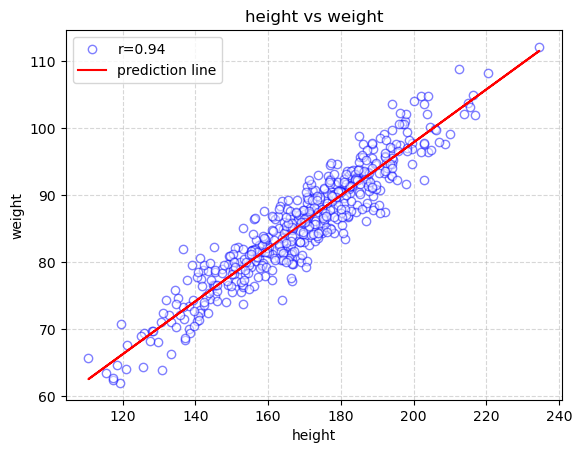

In [69]:
r = np.corrcoef(height, weight)[0,1]
plt.plot(height, weight, "bo", mfc="white", alpha=0.5, label=f"r={r:.2f}")
plt.plot(height, y_hat, "r-", label ="prediction line")
plt.xlabel("height")
plt.ylabel("weight")
plt.title("height vs weight")
plt.grid(alpha=0.5, ls='--')
plt.legend()
plt.show()

tips on the basis of total bill in tips datasets